In [1]:
%load_ext autoreload
%matplotlib inline

In [98]:
%autoreload 2

import sys,os,glob
import matplotlib
import matplotlib.pyplot as plt

## Add own library to path
workdir = os.getcwd()
thismodule = sys.modules[__name__]
moduledir = os.path.join(os.path.dirname(workdir),'src')
functionsdir = os.path.join(os.path.dirname(workdir),'functions')
sys.path.insert(0,moduledir)
sys.path.insert(0,functionsdir)
for includedir in [moduledir,functionsdir]:
    print("Own modules available:", [os.path.splitext(os.path.basename(x))[0]
                                     for x in glob.glob(os.path.join(includedir,'*.py'))])

from conditionalstats import *
from plot1DInvLog import *

## Graphical parameters
plt.style.use(os.path.join(matplotlib.get_configdir(),'stylelib/presentation.mplstyle'))

Own modules available: ['conditionalstats']
Own modules available: ['plot2D', 'plot1DInvLog']


In [3]:
emptyD = EmptyDistribution()
defaultD = Distribution()

In [4]:
print(defaultD)

bin_locations_stored : False
bins : None
bintype : linear
density : None
fill_last_decade : None
name : 
nbins : 0
nbpd : None
nlb : 50
nlr : None
nppb : None
overwrite : False
percentiles : None
ranks : None
size : 0
vmax : None
vmin : None



# Example distributions on linear bins

In [5]:
x_norm = np.random.normal(size=100000) # Sampling a standard normal distribution
xmax = 4
xmin = -xmax

In [6]:
y_lognorm = np.exp(x_norm) # lognormal distribution from x
ymin,ymax = np.exp(xmin),np.exp(xmax)

In [7]:
dist_x_linear = Distribution(name='x',nlb=40)
dist_x_linear.computeDistribution(sample=x_norm,vmin=xmin,vmax=xmax)

In [8]:
dist_y_linear = Distribution(name='y',nlb=40)
dist_y_linear.computeDistribution(sample=y_lognorm,vmin=ymin,vmax=ymax)

In [9]:
print(dist_x_linear)

bin_locations_stored : False
bins : [-4.  -3.8 -3.6 -3.4 -3.2 -3.  -2.8 -2.6 -2.4 -2.2 -2.  -1.8 -1.6 -1.4
 -1.2 -1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1.   1.2  1.4
  1.6  1.8  2.   2.2  2.4  2.6  2.8  3.   3.2  3.4  3.6  3.8  4. ]
bintype : linear
density : [1.50010501e-04 3.50024502e-04 7.00049003e-04 2.10014701e-03
 4.00028002e-03 5.65039553e-03 9.90069305e-03 1.70511936e-02
 2.79519566e-02 4.42030942e-02 6.34044383e-02 9.01563109e-02
 1.30759153e-01 1.66811677e-01 2.19215345e-01 2.63268429e-01
 3.19222346e-01 3.52774694e-01 3.81776724e-01 3.95777704e-01
 3.96127729e-01 3.87527127e-01 3.49074435e-01 3.14422010e-01
 2.59318152e-01 2.17365216e-01 1.76462352e-01 1.27808947e-01
 9.57567030e-02 6.81047673e-02 4.27029892e-02 2.80019601e-02
 1.73012111e-02 1.19008331e-02 5.95041653e-03 3.60025202e-03
 1.95013651e-03 8.00056004e-04 3.50024502e-04 2.50017501e-04]
fill_last_decade : None
frac_above_vmax : 3e-05
frac_below_vmin : 4e-05
name : x
nbins : 40
nbpd : None
nlb : 40
nlr 

Text(0, 0.5, 'Cumulative density (CDF)')

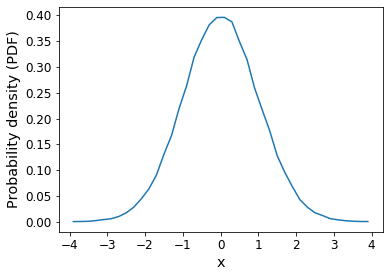

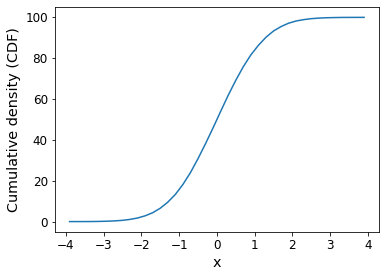

In [10]:
d = dist_x_linear
plt.plot(d.percentiles,d.density)
plt.xlabel('x')
plt.ylabel('Probability density (PDF)')

plt.figure()
plt.plot(d.percentiles,d.ranks)
plt.xlabel('x')
plt.ylabel('Cumulative density (CDF)')

# Example distributions on logarithmic bins

In [11]:
dist_y_log = Distribution(name='y',bintype='log',nbpd=50)
dist_y_log.computeDistribution(sample=y_lognorm,vmin=ymin,vmax=ymax)

In [12]:
# print(dist_y_log)

Text(0, 0.5, 'Probability density (PDF)')

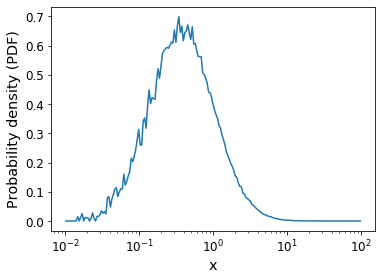

In [13]:
d = dist_y_log
plt.plot(d.percentiles,d.density)
plt.xscale('log')
plt.xlabel('x')
plt.ylabel('Probability density (PDF)')

The lognormal distribution, initially generated on regularly-spaced bins in x, appears noisier in bins containing few points after the logarithmic transformation. A lognormal process should appear smoother.

Text(0.5, 0, 'x')

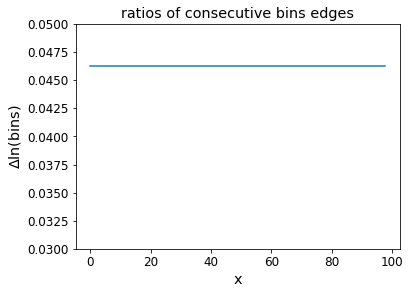

In [14]:
bin_ratios = np.log(dist_y_log.bins[1:]/dist_y_log.bins[:-1])
plt.plot(dist_y_log.percentiles,bin_ratios)
# plt.xscale('log')
plt.title('ratios of consecutive bins edges')
plt.ylim((0.03,0.05))
plt.ylabel(r'$\Delta \ln$(bins)')
plt.xlabel('x')

# Example distribution on linear ranks (10th,20th,30th,...)

In [23]:
dist_x_linQ = Distribution(name='x',bintype='linQ')
dist_x_linQ.computeDistribution(sample=x_norm,vmin=xmin,vmax=xmax)

Text(0, 0.5, 'Cumulative density (CDF)')

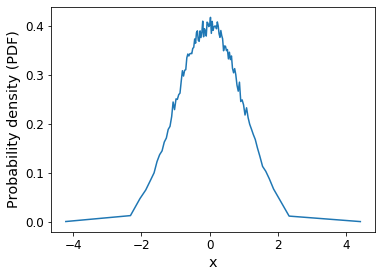

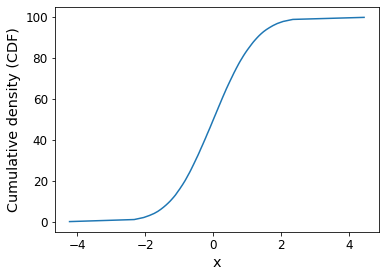

In [24]:
d = dist_x_linQ
plt.plot(d.percentiles,d.density)
plt.xlabel('x')
plt.ylabel('Probability density (PDF)')
plt.figure()
plt.plot(d.percentiles,d.ranks)
plt.xlabel('x')
plt.ylabel('Cumulative density (CDF)')

There, the sampling is such that percentiles ranges of a given width contain a constant number of points (y-axis of bottom panel is regularly sampled): bins in the middle of the x-range have smaller sampling sizes.

In [25]:
dist_y_linQ = Distribution(name='y',bintype='linQ')
dist_y_linQ.computeDistribution(sample=y_lognorm,vmin=ymin,vmax=ymax)

Text(0, 0.5, 'Cumulative density (CDF)')

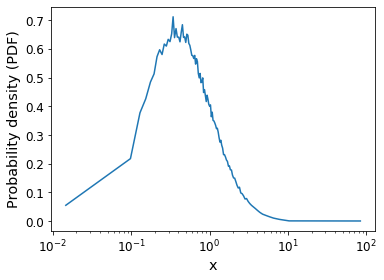

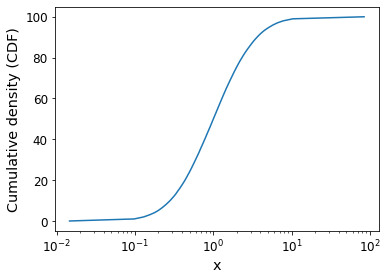

In [26]:
d = dist_y_linQ
plt.plot(d.percentiles,d.density)
plt.xscale('log')
plt.xlabel('x')
plt.ylabel('Probability density (PDF)')

plt.figure()
plt.plot(d.percentiles,d.ranks)
plt.xscale('log')
plt.xlabel('x')
plt.ylabel('Cumulative density (CDF)')

# Sample inverse-logarithmic ranks

In [27]:
dist_y_invlogQ = Distribution(name='y',bintype='invlogQ',fill_last_decade=True)
dist_y_invlogQ.computeDistribution(sample=y_lognorm,vmin=ymin,vmax=ymax)

Text(0, 0.5, 'Cumulative density (CDF)')

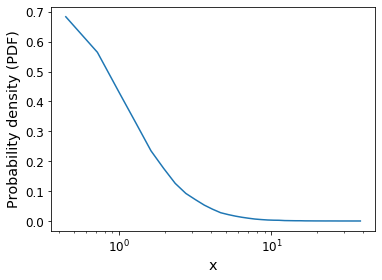

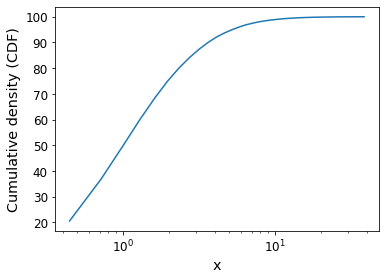

In [28]:
d = dist_y_invlogQ
plt.plot(d.percentiles,d.density)
plt.xscale('log')
plt.xlabel('x')
plt.ylabel('Probability density (PDF)')

plt.figure()
plt.plot(d.percentiles,d.ranks)
plt.xscale('log')
plt.xlabel('x')
plt.ylabel('Cumulative density (CDF)')

# Equivalence between these sampling strategies

In [101]:
def plotMultiVisualization(axs,d,label,offset=0):

    rankmin,rankmax = 10,99.99
    
#     i_min = np.where(d.ranks >= rankmin)[0][0]
#     i_max = np.where(d.ranks <= rankmax)[0][-1]
    
#     print(i_min,i_max)
    
    if isinstance(d,list):
        pass

    else:
        axs[0,0].plot(d.percentiles,d.density,label=label)
        axs[0,1].plot(d.percentiles,d.density)
        axs[0,1].set_xscale('log')
        axs[1,0].plot(d.percentiles,d.ranks)
        axs[1,1].plot(d.percentiles,d.ranks)
        axs[1,1].set_xscale('log')
        
        subplotRanksILog(axs[2,0],d.ranks,d.percentiles,\
                         rankmin=rankmin,rankmax=rankmax,\
                         offset=offset)
        subplotRanksILog(axs[2,1],d.ranks,d.percentiles,\
                         rankmin=rankmin,rankmax=rankmax,\
                         offset=offset)
        axs[2,1].set_yscale('log')

/Users/bfildier/Code/dev_python/conditional-stats/functions/plot1DInvLog.py:64: RuntimeWarning: divide by zero encountered in true_divide
  # plot
/Users/bfildier/Code/dev_python/conditional-stats/functions/plot1DInvLog.py:64: RuntimeWarning: divide by zero encountered in true_divide
  # plot
/Users/bfildier/Code/dev_python/conditional-stats/functions/plot1DInvLog.py:64: RuntimeWarning: divide by zero encountered in true_divide
  # plot
/Users/bfildier/Code/dev_python/conditional-stats/functions/plot1DInvLog.py:64: RuntimeWarning: divide by zero encountered in true_divide
  # plot


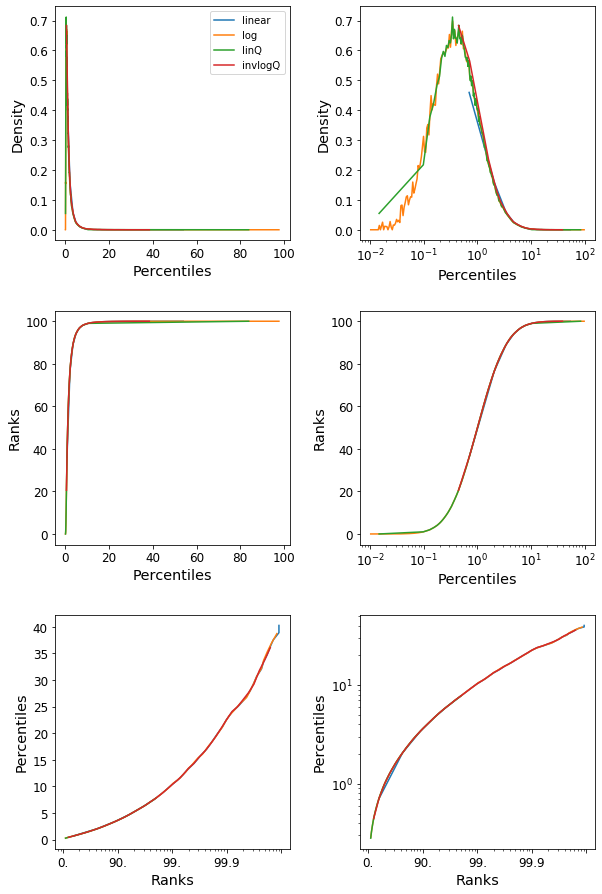

In [102]:
d_list = [dist_y_linear,dist_y_log,dist_y_linQ,dist_y_invlogQ]
d_lab = ['linear','log','linQ','invlogQ']

xlabels = ['Percentiles']*2+['Ranks']
ylabels = ['Density','Ranks','Percentiles']

fig,axs = plt.subplots(ncols=2,nrows=3,figsize=(10,15))

inds2plot = (0,1,2,3)

for i_d in inds2plot:
    plotMultiVisualization(axs,d_list[i_d],label=d_lab[i_d],offset=1)

for i in range(3):
    for j in range(2):
        axs[i,j].set_xlabel(xlabels[i])
        axs[i,j].set_ylabel(ylabels[i])

axs[0,0].legend()

